In [1]:
import json
import os
import fastwer

In [2]:
with open('gold_transcripts.json') as json_file:
    gold = json.load(json_file)

In [3]:
with open('./CTC_baseline_splits/test.json') as json_file:
    ctc_test = json.load(json_file)
    
with open('./CTC_LM_rescore_splits/test.json') as json_file:
    ctc_lm_test = json.load(json_file)

In [4]:
cerlist = []
werlist = []

In [5]:
for key, pred in ctc_test.items():
    y = gold[key]
    cerlist.append(fastwer.score_sent(pred, y, char_level=True))
    werlist.append(fastwer.score_sent(pred, y))

In [7]:
cerlistl = []
werlistl = []
for key, pred in ctc_lm_test.items():
    y = gold[key]
    cerlistl.append(fastwer.score_sent(pred, y, char_level=True))
    werlistl.append(fastwer.score_sent(pred, y))

In [10]:
import numpy as np
print(np.average(werlist))
print(np.average(werlistl))

print(np.average(cerlist))
print(np.average(cerlistl))

68.54627965000002
59.933487549999995
26.7606619
29.6005387


In [20]:
print(np.median(werlist))
print(np.median(werlistl))

print(np.median(cerlist))
print(np.median(cerlistl))

69.2308
58.3333
25.0
26.5006


In [26]:
len(cerlist)

2000

In [12]:
import matplotlib.pyplot as plt

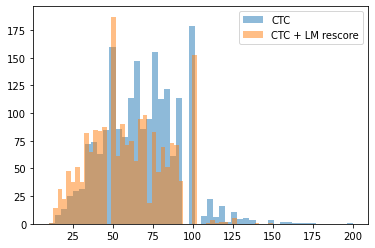

In [18]:
# bins = numpy.linspace(-10, 10, 100)

plt.hist(werlist, bins=50, alpha=0.5, label='CTC')
plt.hist(werlistl, bins=50, alpha=0.5, label='CTC + LM rescore')
plt.legend(loc='upper right')
plt.show()

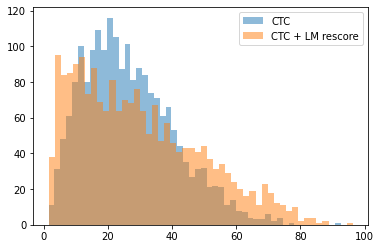

In [19]:
# bins = numpy.linspace(-10, 10, 100)

plt.hist(cerlist, bins=50, alpha=0.5, label='CTC')
plt.hist(cerlistl, bins=50, alpha=0.5, label='CTC + LM rescore')
plt.legend(loc='upper right')
plt.show()

In [21]:
import error
import fastwer
from time import perf_counter

In [23]:
for key, val in ctc_test.items():
    print(val)
    print(gold[key])
    
    start = perf_counter()
    error.cer(val, gold[key])
    print(perf_counter()-start)
    
    start = perf_counter()
    error.wer(val, gold[key])
    print(perf_counter()-start)
    
    start = perf_counter()
    print(fastwer.score_sent(val, gold[key]))
    print(perf_counter()-start)
    
    start = perf_counter()
    fastwer.score_sent(val, gold[key], char_level=True)
    print(perf_counter()-start)
    break

hanno rot of his expedition in stel
Hannu wrote of his expedition in stone.
0.000484247000713367
2.6545996661297977e-05
42.8571
4.2263003706466407e-05
1.4076002116780728e-05


In [13]:
!pip3 install fastwer

  Using cached fastwer-0.1.3.tar.gz (4.6 kB)
  Created wheel for fastwer: filename=fastwer-0.1.3-cp36-cp36m-linux_x86_64.whl size=58907 sha256=b5e11e67426a528e6717443bfb4ac534722fec7de7bd87c9c691edbff11ff030
  Stored in directory: /home/ec2-user/.cache/pip/wheels/5b/3a/d4/c2c578166948e5523cbb896b3b71dcee6a64b22099a3c7accb
Successfully built fastwer
